# Understading Universal Approximation Theroem

- A neural network, we don't tell the computer how to solve our problem. Instead, it learns from observational data, figuring out its solution to the pro. at hand.

- Until Recently we didn't know how to train neural networks to surpass more traditional approaches, except for a few specialized problems. What changed was the discovery of techniques for learning in so-called deep neural networks.

直到现在我们也不直到如何训练NN使得它超过大部分的传统方法，除了一些特定的问题外。出现的DNN，改变的只是“学习的技巧”。

- 有个想法：怎么建立一个模型，它既可以解决图像问题，又能解决语音问题？

- 神经网络如何逼近函数，按照什么样的意义收敛?

1. 1991 Approximation Capabilities of Multilayer Feedforward Networks
2. 1989 Multilayer Feedforward Networks are Universal Approximators
3. 1989 Cybenko Approximation by Superpositions of a Sigmoidal Function
4. 1992 MULTILAYER FEEDFORWARD NETWORKS WITH A NON-POLYNOMIAL ACTIVATION FUNCTION CAN APPPROXIMATE ANY FUNCTION

# 一、Universality with one input and one output

lets start by understanding how to construct a neural network which approximates a function with just one input and one output:

if observed keenly, this is the core of the problem of universality. Once we've understood this special case it's pretty easy to extend to functions with many inputs and many ouputs

https://towardsai.net/p/deep-learning/understanding-the-universal-approximation-theorem

https://michaelnielsen.org/

# 二、深度神经网络可以任意逼近Borel可测函数

(Hornik,1989)证明了：在不限制神经网络规模的情况下，深度神经网络作为一个函数，不管用哪个squashing function(单调不减的sigmoidal function)作为激活函数，不管在哪个有界度量的意义下，都可以用来逼近任意Borel可测函数。

https://www.bilibili.com/video/BV1qX4y1E73J/?spm_id_from=333.337.search-card.all.click

（1）只要一族单隐藏层神经网络的激活函数是连续、有界、非常值的，那么这样的神经网络可以用来一致逼近连续函数
<br>
（2）去除(1)中的“连续”条件，那么这样的神经网络只能在$L^p$意义下逼近可积函数
<br>
（3）上述可以推广到各阶导数情况
<br>
（4）上述可以推广到多个隐藏层的情况
<br>
（5）没有给出收敛阶，参考: Allan Pinkus (1999) Approximation therory of the MLP model in neural networks.

https://hackernoon.com/illustrative-proof-of-universal-approximation-theorem-5845c02822f6

https://medium.com/dataseries/24-really-f-ing-interesting-deep-learning-papers-fa26afe3a070
<br>
https://www.desmos.com/calculator/pboqbxnl9z?lang=zh-CN
<br>
https://sugoidesune.github.io/readium/
<br>
https://www.jiqizhixin.com/articles/2021-09-07-6
<br>
https://morioh.com/a/b15c255a7125/you-dont-understand-neural-networks-until-you

## 1. A Deeper Exploration

Any continuous function on a compact (bounded,closed) set can be approximated by a piecewise function. Take, for instaance:

$$ sin（x）= \left\{
\begin{array}{11}
     x & {-0.5 < x < 0.5} \\
     \frac{1}{2.3}*(x + \frac{\pi}{2})^2 - 1 & -3 < x < -0.5 \\
     \frac{1}{2.3}*-(x - \frac{\pi}{2})^2 + 1 & 0.5 < x < 3 \\
\end{array}
\right.  $$

一个sinx函数被拆分成一个线性函数和两个二次函数进行分段组合。

Cybenko 进一步具体化上面提到的piecewise function，理论上，任意一个连续函数在一个compact set（有界、封闭）上都能够被分段的常数函数进行拟合。（实际操作则是，将输入经过线性单元和非线性单元，最后输出为常数，再将多个输出组合成分段函数，最后得以拟合最终函数）

With enough constant regions (‘steps’), one can reasonably estimate the function within the bounds it is given in.

## 2. Sigmoid Curve
+ Population
+ work hard and salary
+ exerise and lossing weight
+ virus population

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [68]:
sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

In [69]:
import random

In [84]:
def random_linear(x):
    k, b = random.normalvariate(0, 1), random.normalvariate(0, 1)
    
    return k * x + b

<IPython.core.display.Javascript object>


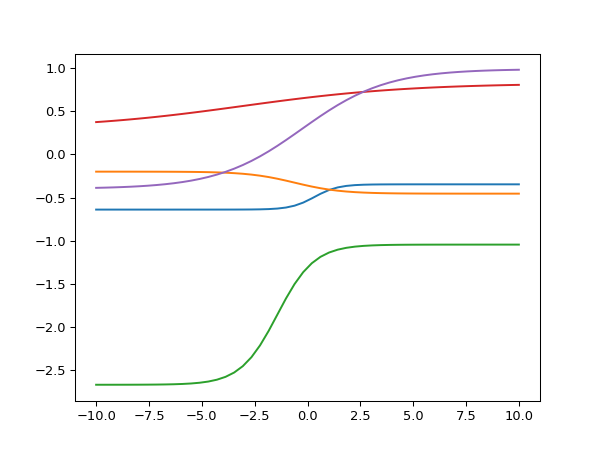

In [85]:
for _ in range(5):
    plt.plot(sub_x, random_linear(sigmoid(random_linear(sub_x))))

In [72]:
range(5)

range(0, 5)

## However, there are more complicated functions in my life

In [73]:
from matplotlib.animation import FuncAnimation

In [74]:
%matplotlib notebook

In [75]:
def complex_function(x):
    return (random_linear(sigmoid(x)))

In [ ]:
index = np.random.choice(range(len(sub_x)))
# piecewise function
y = np.concatenate((complex_function(sub_x[:index]), complex_function(sub_x[index:])))
plt.plot(sub_x, y)

In [82]:
def animate(i):
    fig.clear()
    index = np.random.choice(range(len(sub_x)))
    # piecewise function
    y = np.concatenate((complex_function(sub_x[:index]), complex_function(sub_x[index:])))
    plt.plot(sub_x, y)
    plt.title('Complexity Functions Generated by Simple Functions')

<IPython.core.display.Javascript object>


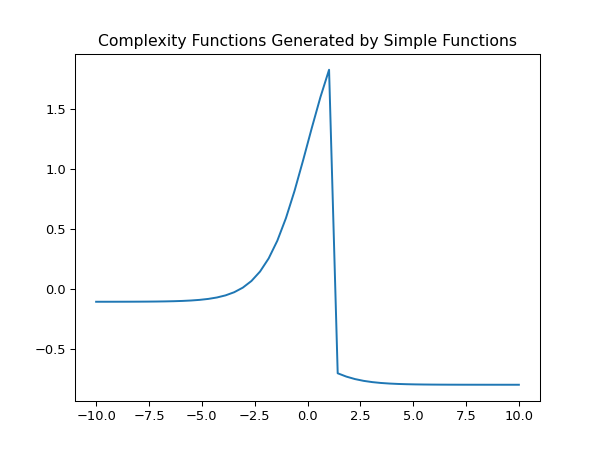

In [83]:
fig = plt.gcf()
ani = FuncAnimation(fig, animate, interval=300)
plt.show()